# Diabetes Classifier
Source: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download

## Background

Originally, this dataset is from the CDC's Behavioral Risk Factor Surveillance System (BRFSS) that surveyed over 400,000 people on various health indicators in 2015. There's an open-source version on Kaggle that cleaned this data, removing null values and focusing specifically on diabetes-related factors in accordance with [research released by the CDC on training risk prediction models for diabetes](https://www.cdc.gov/pcd/issues/2019/19_0109.htm). The dataset was reduced from 400,000 responses to around 70,000 responses, removing null values, factors not associated with diabetes, responses that were "I don't know" or "refuse to answer", and created a randomly selected 50/50 split between diabetics and non-diabetics for ease of training machine learning models. The selected factors are as follows:

### Dependent Variable:

- **DIABETES_BINARY** Were you ever told you have diabetes? _In the original dataset, there were questions to account for prediabetes, bordeline diabetes, and gestational diabetes. For the sake of this analysis, we are using a dataset which operates on a binary of diabetic (excluding gestational diabetes) or non-diabetic_.

### Independent Variables:

- **HIGHBP** Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional
- **HICHOL** Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?
- **CHOLCHECK** Cholesterol check within past five years
- **BMI** Body Mass Index
- **SMOKER** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- **STROKE** Were you ever told you had a stroke?
- **HEARTDISEASEORATTACK** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- **PHYSACTIVITY** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- **FRUITS** Consume Fruit 1 or more times per day
- **VEGGIES** Consume Vegetables 1 or more times per day
- **HVYALCOHOLCONSUMP** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
- **ANYHEALTHCARE**  Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?
- **NODOCBCCOST** Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 
- **GENHLTH** Would you say that in general your health is?
- **MENTHLTH** Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
- **PHYSHLTH** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
- **DIFFWALK** Do you have serious difficulty walking or climbing stairs?
- **SEX** Indicate sex of respondent.
- **AGE** Fourteen-level age category
- **EDUCATION** What is the highest grade or year of school you completed?
- **INCOME** Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.")


## Importing Data

Verify that downloading the CSV works as expected. Run the frame below and ensure that a graph showing the data appears below the cell.

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from skopt import BayesSearchCV
from scipy.stats import loguniform
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier


# Read CSV from data directory
filepath = "../Project2_Malpe_Bodnar_Paracha/ilona_model/data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
health_indicators = pd.read_csv(filepath)

In [4]:
# View shape of CSV
health_indicators.shape

(70692, 22)

In [5]:
# View info of CSV
health_indicators.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


## Data Cleaning

Check for empty values

In [6]:
# Ensure that there are no empty values anywhere
health_indicators.isnull().sum()

# All values are zero, that means no empty values, safe to continue

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# Check datatypes
health_indicators.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

### Initial Exploration

Test out different values in the dataset to get a better visual understanding of what we're working with. Understanding the relationship between variables of the BRFSS dataset is key in getting a more comprehensive understanding of the livelihoods of those who participated in this census. 


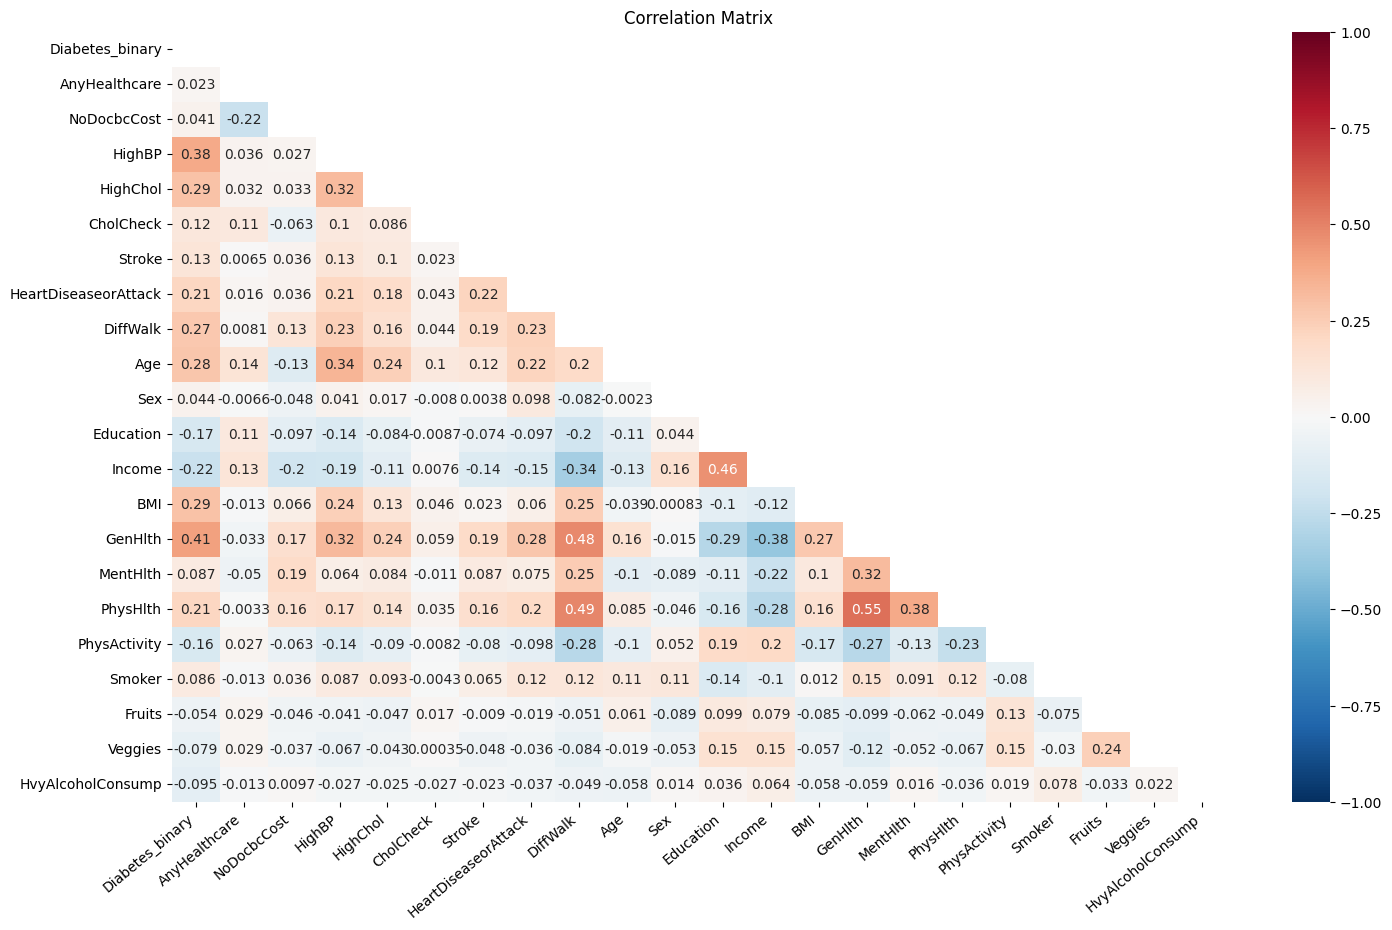

In [8]:
# heatmap to check the correlation between the variables

columns = ['Diabetes_binary'] + ['AnyHealthcare'] + ['NoDocbcCost'] + ['HighBP'] + ['HighChol'] + ['CholCheck'] +['Stroke'] + ['HeartDiseaseorAttack'] + ['DiffWalk'] +  ['Age'] + ['Sex'] + ['Education'] + ['Income'] + ['BMI'] + ['GenHlth'] + ['MentHlth'] + ['PhysHlth'] + ['PhysActivity'] + ['Smoker'] + ['Fruits'] + ['Veggies'] + ['HvyAlcoholConsump']

# Compute the correlation matrix
corr = health_indicators.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(17, 10))
# normalize the color scale
sns.heatmap(health_indicators[columns].corr(), mask=mask, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.xticks(rotation=40, ha="right") 
plt.title('Correlation Matrix')
plt.show()

# referenced from https://stackoverflow.com/questions/50351038/how-to-set-mapping-to-colors-in-seaborn-heatmap

As demonstrated above, there are no overwhelmingly strong correlations between any two variables (no correlation coefficients close to 1, they are all .55 or less). This is important because that means we likely will not suffer from any collinearity or multicollinearity issues and do not need to drop any data fields to account for it.


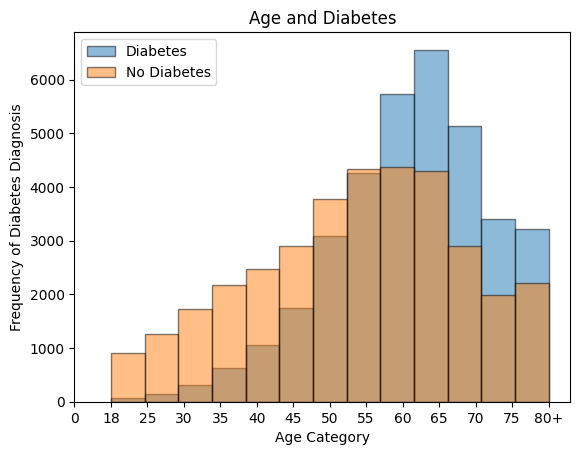

In [9]:
# Distribution of positive diabetes diagnoses by age
age_no_diabetes = health_indicators[health_indicators["Diabetes_binary"] == False]["Age"]
age_yes_diabetes = health_indicators[health_indicators["Diabetes_binary"] == True]["Age"]
plt.hist(
    age_yes_diabetes, bins=13, alpha=0.5, label="Diabetes", edgecolor="black"
)
plt.hist(
    age_no_diabetes, bins=13, alpha=0.5, label="No Diabetes", edgecolor="black"
)
plt.legend()
plt.title("Age and Diabetes")
plt.xlabel("Age Category")
plt.xticks(ticks=np.arange(14), labels=["0", "18", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70", "75", "80+"])
plt.ylabel("Frequency of Diabetes Diagnosis")
plt.show()

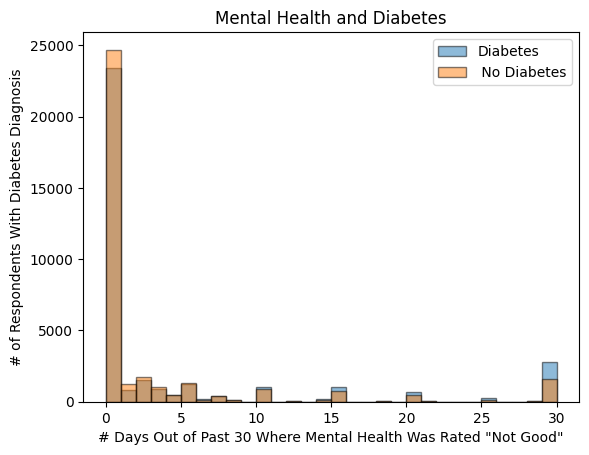

In [10]:
# Correlation between mental health and diabetes?
ment_hlth_no_diabetes = health_indicators[health_indicators["Diabetes_binary"] == False]["MentHlth"]
ment_hlth_yes_diabetes = health_indicators[health_indicators["Diabetes_binary"] == True]["MentHlth"]

plt.hist(
    ment_hlth_yes_diabetes, bins=30, alpha=0.5, label="Diabetes", edgecolor="black"
)
plt.hist(
    ment_hlth_no_diabetes, bins=30, alpha=0.5, label=" No Diabetes", edgecolor="black"
)

plt.legend()
plt.title("Mental Health and Diabetes")
plt.xlabel("# Days Out of Past 30 Where Mental Health Was Rated \"Not Good\"")
plt.ylabel("# of Respondents With Diabetes Diagnosis")
plt.show()

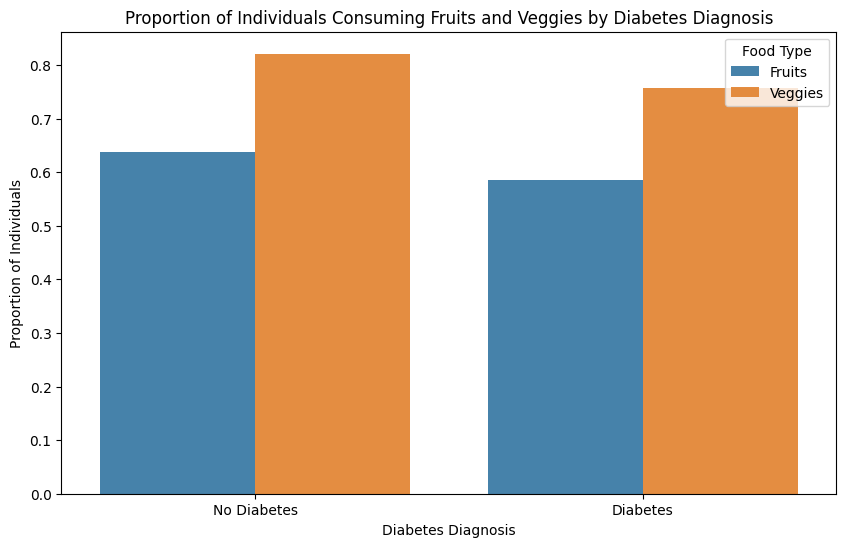

In [11]:
# Correlation between fruits and veggies consumption and diabetes?
fruits_no_diabetes = health_indicators[health_indicators["Diabetes_binary"] == False]["Fruits"]
veggies_no_diabetes = health_indicators[health_indicators["Diabetes_binary"] == False]["Veggies"]
fruits_yes_diabetes = health_indicators[health_indicators["Diabetes_binary"] == True]["Fruits"]
veggies_yes_diabetes = health_indicators[health_indicators["Diabetes_binary"] == True]["Veggies"]
fruits = health_indicators["Fruits"]
veggies = health_indicators["Veggies"]
diabetes = health_indicators["Diabetes_binary"]

# Group by diabetes status and calculate the proportion of individuals consuming fruits and veggies
grouped_data = health_indicators.groupby('Diabetes_binary')[['Fruits', 'Veggies']].mean().reset_index()

# Melt the DataFrame for easier plotting
melted_data = pd.melt(grouped_data, id_vars='Diabetes_binary', var_name='Food Type', value_name='Proportion')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Diabetes_binary', y='Proportion', alpha=0.9, hue='Food Type', data=melted_data)
plt.title('Proportion of Individuals Consuming Fruits and Veggies by Diabetes Diagnosis')
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Proportion of Individuals')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.legend(title='Food Type', loc='upper right')
plt.show()

## Models
In order to calculate risk prediction, we must rely on machine learning techniques to build our predictive models. According to peer-reviewed research released by the CDC, good model options for risk prediction (binary classification problems) are support vector machines (SVM), decision trees, logistic regression, random forests, Gaussian Naive Bayes classifiers, and neural networks. I will specifically be using logistic regression for this problem since the dependent variable (diabetic or not) is a binary classification. 

Let's start by implementing a dummy classifier to create a baseline that we can use to compare performance with other models (functionally treating it as a sort of “null hypothesis”).
There are various simple implementations for dummy classifiers, but I chose to go with the “most frequent” strategy, which simply always returns the most frequent class label in the observed y argument passed to fit. 


Accuracy score: 0.49855010962585755
[[   0    0]
 [7090 7049]]


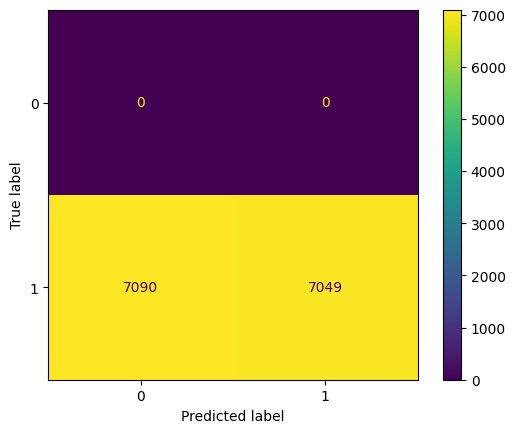

In [12]:
# Dummy Classifier Model
# Establish baseline to compare more sophisticated models define and fit 

# Deep copy of the original dataset to prevent any modification to original values.
dummy_dataset = health_indicators.copy(deep=True)

x_dummy = dummy_dataset.drop("Diabetes_binary", axis=1)
y_dummy = dummy_dataset["Diabetes_binary"].astype("bool")
X_train, X_test, y_train, y_test = train_test_split(x_dummy, y_dummy, test_size=0.2, random_state=42)

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dt_pred = dummy_clf.predict(X_test)
print(f'Accuracy score: {dummy_clf.score(X_test, y_test) }')

dt_log = confusion_matrix(dt_pred, y_test)
print(dt_log)
disp = ConfusionMatrixDisplay(dt_log)
disp.plot()

As demonstrated by the confusion matrix above, the dummy classifier was unsuccessful in labeling any True negatives, since it determined True was the most frequent value and used that to predict all future values. Additionally, its accuracy score was weak at 49.86%, giving it about a coin flip’s chance of getting a prediction right. 


Let's move onto implementing our logistic regression. A logistic regression attempts to predict the probability of an outcome occurring bound between 0 and 1. Once again, given the distribution of the binary outcome variable of ‘Diabetes Binary’ is 0 or 1, this model is an ideal fit for us to understand the relationship of our independent variables in understanding diabetes occurrences.

Accuracy: 0.7484970648560718
              precision    recall  f1-score   support

       False       0.76      0.73      0.74      7090
        True       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Confusion Matrix:


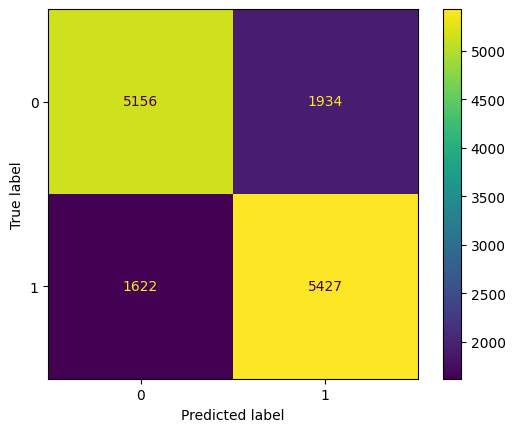

In [14]:
# Logistic Regression

# Create a deep copy of the original dataset to prevent any modification to original values.
logistic_dataset = health_indicators.copy(deep=True)

# Train with all columns
columns_to_train = ["HighBP", "HighChol", "CholCheck", "BMI", "Smoker",\
                    "Stroke", "HeartDiseaseorAttack", "PhysActivity",\
                    "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",\
                    "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk",\
                    "Sex", "Age", "Education", "Income"]

scaler = StandardScaler()
# Fit the scaler to the training data and transform it
logistic_dataset[columns_to_train] = scaler.fit_transform(logistic_dataset[columns_to_train])
logistic_model = linear_model.LogisticRegression(solver="saga", max_iter=1000)

x_log = logistic_dataset.drop("Diabetes_binary", axis=1)
y_log = logistic_dataset["Diabetes_binary"].astype("bool")

X_train, X_test, y_train, y_test = train_test_split(x_log, y_log, test_size=0.2, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# other metrics
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm_log = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(cm_log)
disp.plot()